<a href="https://colab.research.google.com/github/AfifNurraihan/AfifNurraihan/blob/main/Analisis_Data_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests
resp_jateng=requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_jateng_raw=resp_jateng.json()
print('Nama-nama elemen utama: \n', cov_jateng_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Tengah : %d' %cov_jateng_raw['kasus_total'])
print('Presentase kematian akibat Covid-19ndi Jawa Tengah : %f.2%%' %cov_jateng_raw['meninggal_persen'])
print('Presentase tingkat kesembuhan dari covid-19 di Jawa Tengah : %f.2%%' %cov_jateng_raw['sembuh_persen'])

Nama-nama elemen utama: 
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Tengah : 28307
Presentase kematian akibat Covid-19ndi Jawa Tengah : 5.542799.2%
Presentase tingkat kesembuhan dari covid-19 di Jawa Tengah : 80.050871.2%


In [25]:
#Menampilkan Informasi Data Covid
import numpy as np
import pandas as pd
cov_jabar=pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar : \n',cov_jabar.info())
print('\nLima data teratas cov_jabar : \n',cov_jabar.head())

#Menjinakan Data 
cov_jabar_tidy=(cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                          if item.startswith('AKUMULASI')
                                          or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus':'kasus_baru'})
)
cov_jabar_tidy['tanggal']=pd.to_datetime(cov_jabar_tidy['tanggal']*1e6,unit='ns')
print('Lima data teratas : \n',cov_jabar_tidy.head(1000))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       213 non-null    int64
 1   KASUS                         213 non-null    int64
 2   MENINGGAL                     213 non-null    int64
 3   SEMBUH                        213 non-null    int64
 4   DIRAWAT_OR_ISOLASI            213 non-null    int64
 5   AKUMULASI_KASUS               213 non-null    int64
 6   AKUMULASI_SEMBUH              213 non-null    int64
 7   AKUMULASI_MENINGGAL           213 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  213 non-null    int64
dtypes: int64(9)
memory usage: 15.1 KB
Info cov_jabar : 
 None

Lima data teratas cov_jabar : 
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584489600000      1  ...                    1                             0
1  1584576000

<Figure size 432x288 with 0 Axes>

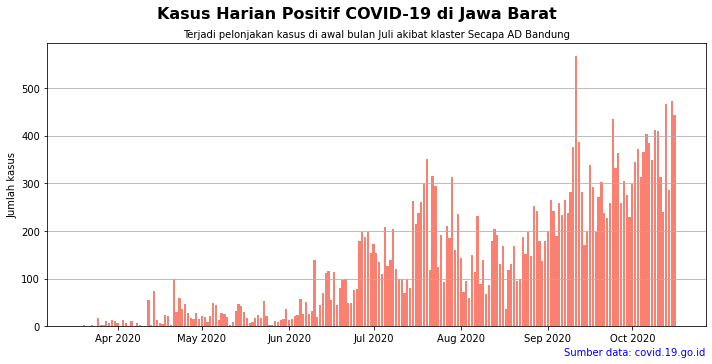

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('\nTerjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

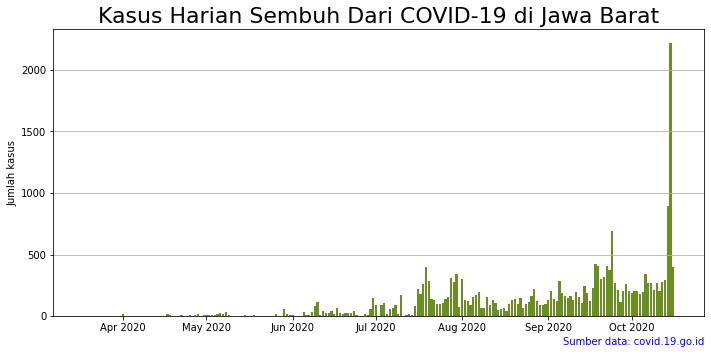

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

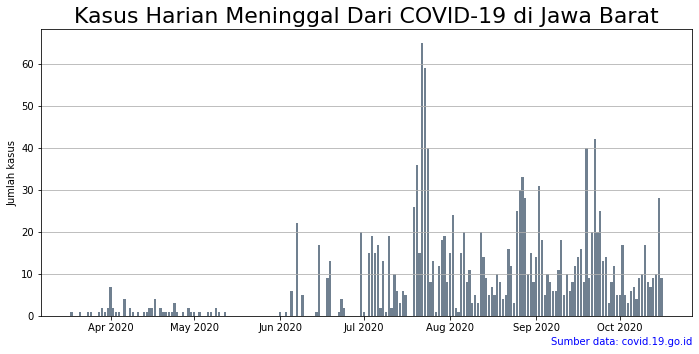

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     31 non-null     int64
 1   pekan_ke  31 non-null     int64
 2   jumlah    31 non-null     int64
dtypes: int64(3)
memory usage: 872.0 bytes
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        12       5
1   2020        13      47
2   2020        14      55
3   2020        15      80
4   2020        16     149


In [32]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        12       5                 0       False
1   2020        13      47                 5       False
2   2020        14      55                47       False
3   2020        15      80                55       False
4   2020        16     149                80       False
5   2020        17     302               149       False
6   2020        18     127               302        True
7   2020        19     201               127       False
8   2020        20     180               201        True
9   2020        21     152               180        True


<Figure size 432x288 with 0 Axes>

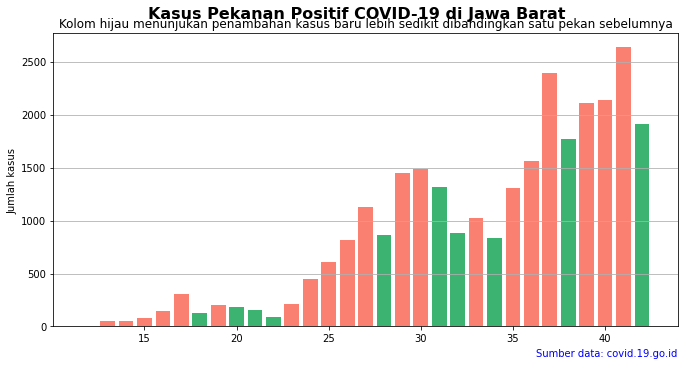

In [33]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
208,2020-10-12,6276,18847,1506
209,2020-10-13,6442,19138,1515
210,2020-10-14,5821,20035,1525
211,2020-10-15,4043,22257,1553
212,2020-10-16,4081,22653,1562
